In [1]:
import numpy as np
import plotters as plot
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
pjme_df = pd.read_csv('./data/PJME_hourly.csv', delimiter=',', nrows = None)
pjme_df['Datetime'] = pd.to_datetime(pjme_df['Datetime'])
# pjme_df.set_index('Datetime', inplace=True)
# Assuming pjme_df is already sorted by date
split_date = '2017-01-01'  # You can adjust this date as needed

train = pjme_df[pjme_df['Datetime'] < split_date]
test = pjme_df[pjme_df['Datetime'] >= split_date]

print(f"Train set shape: {train.shape}")
print(f"Test set shape: {test.shape}")

Train set shape: (131470, 2)
Test set shape: (13896, 2)


/var/folders/bj/vqft4btx31x4b208qdl7q1nm0000gn/T/ipykernel_4635/1213430336.py:32: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start=df.index[0], periods=len(forecast), freq='H')


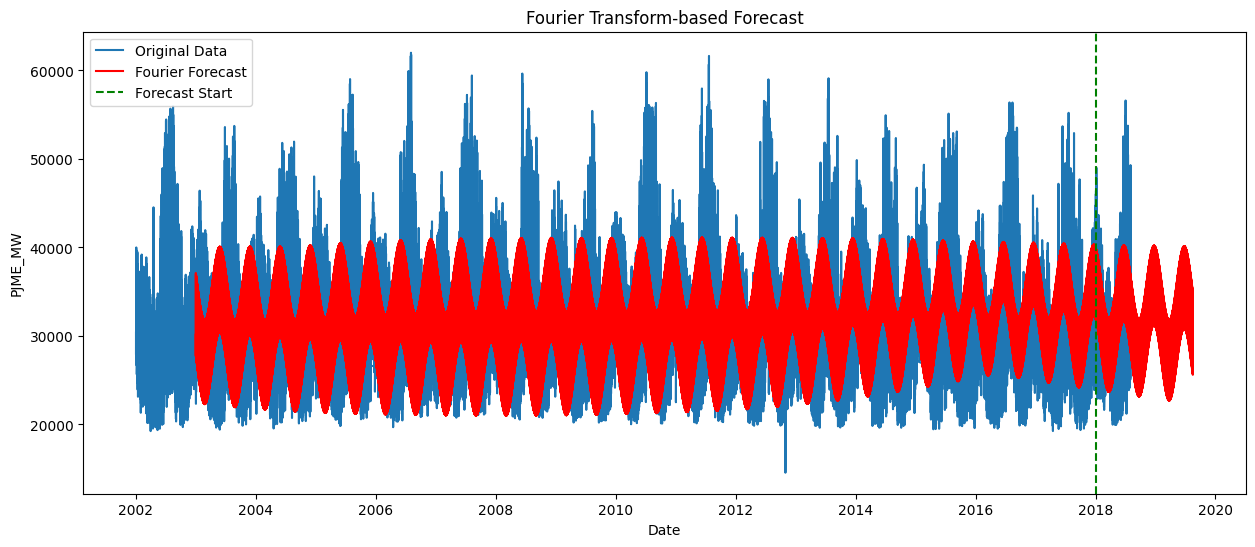

Dominant frequencies (cycles per day):
[ 0.04166724  0.08335512 -0.08335512  0.041681   -0.041681    0.00022701
 -0.00022701  0.04167412 -0.04167412  0.        ]

Corresponding periods (in days):
[   23.9996698     11.99686391   -11.99686391    23.99174781
   -23.99174781  4405.03030303 -4405.03030303    23.99570815
   -23.99570815]


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import fftpack

# Assuming pjme_df is your DataFrame with 'Datetime' and 'PJME_MW' columns
df = pjme_df.set_index('Datetime')

# Extract the time series data
y = df['PJME_MW'].values
N = len(y)

# Compute the Fourier transform
yf = fftpack.fft(y)
xf = fftpack.fftfreq(N, d=1)  # Assumes daily data, adjust if different

# Find dominant frequencies
n_highest = 10  # Number of frequencies to keep
indices = np.argsort(np.abs(yf))[-n_highest:]
yf_clean = yf.copy()
yf_clean[np.abs(xf) > 0.5] = 0  # Filter out high frequencies
yf_clean[~np.isin(np.arange(N), indices)] = 0  # Keep only dominant frequencies

# Inverse FFT to get the filtered signal
y_filtered = fftpack.ifft(yf_clean).real

# Forecast future values
forecast_days = 365
forecast = np.concatenate([y_filtered, y_filtered[:forecast_days]])

# Create date range for the forecast
future_dates = pd.date_range(start=df.index[0], periods=len(forecast), freq='H')

# Plot results
plt.figure(figsize=(15, 6))
plt.plot(df.index, y, label='Original Data')
plt.plot(future_dates, forecast, color='red', label='Fourier Forecast')
plt.axvline(x=df.index[-1], color='green', linestyle='--', label='Forecast Start')
plt.title('Fourier Transform-based Forecast')
plt.xlabel('Date')
plt.ylabel('PJME_MW')
plt.legend()
plt.show()

# Print the dominant frequencies
dominant_freqs = xf[indices]
print("Dominant frequencies (cycles per day):")
print(dominant_freqs)
print("\nCorresponding periods (in days):")
print(1/dominant_freqs[dominant_freqs != 0])